## Calculating the Return of Indices

Consider three famous American market indices – Dow Jones, S&P 500, and the Nasdaq for the period of 1st of January 2000 until today.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [16]:
tickers = ['^GSPC', '^IXIC','^DJI']
data_dir = '../dataset'
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = pd.read_csv(os.path.join(data_dir, t+'.csv'), index_col=0, na_values='null')['Adj Close']
mydata.index = pd.to_datetime(mydata.index)
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4344 entries, 2000-01-03 to 2017-04-07
Data columns (total 3 columns):
^GSPC    4343 non-null float64
^IXIC    4343 non-null float64
^DJI     4344 non-null float64
dtypes: float64(3)
memory usage: 135.8 KB


In [17]:
mydata.loc['20160629']

^GSPC             NaN
^IXIC             NaN
^DJI     17694.679688
Name: 2016-06-29 00:00:00, dtype: float64

Normalize the data to 100 and plot the results on a graph. 

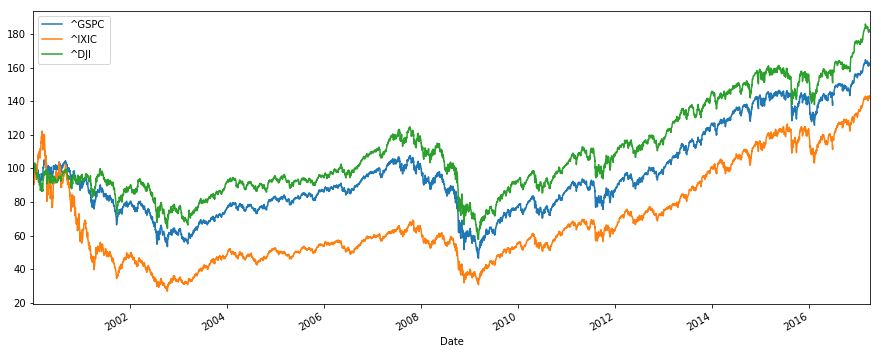

In [18]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(15, 6))
plt.show()

How would you explain the common and the different parts of the behavior of the three indices?

*****

Obtain the simple returns of the indices.

In [21]:
simple_returns = (mydata / mydata.shift(1) - 1)
simple_returns.tail()

,^GSPC,^IXIC,^DJI
Date,,,
2017-04-03,-0.001642,-0.002886,-0.000630
2017-04-04,0.000560,0.000667,0.001890
2017-04-05,-0.003055,-0.005786,-0.001986
2017-04-06,0.001930,0.002467,0.000717
2017-04-07,-0.000827,-0.000194,-0.000331


Estimate the average annual return of each index.

In [23]:
num_of_trading_days = 250
avg_return_a = simple_returns.mean() * num_of_trading_days
print avg_return_a

^GSPC    0.045078
^IXIC    0.051584
^DJI     0.051196
dtype: float64
